In [93]:
import os 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

<b><font size = 5>Multiclass Naive Bayes (BENIGN, BENIGN_WITHOUT_CALLBACK, MALIGNANT)</font></b>

In [94]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [95]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train\cropped_files", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test\cropped_files", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train\cropped_files", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test\cropped_files", DIM)

In [96]:
nb_calc = GaussianNB()
nb_calc.fit(calc_train_data, calc_train_targets)

nb_mass = GaussianNB()
nb_mass.fit(mass_train_data, mass_train_targets)

GaussianNB()

In [97]:
y_pred_calc = nb_calc.predict(calc_test_data)
calc_confusion = confusion_matrix(y_pred_calc, calc_test_targets, labels = nb_calc.classes_)
y_pred_mass = nb_mass.predict(mass_test_data)
mass_confusion = confusion_matrix(y_pred_mass, mass_test_targets, labels = nb_mass.classes_)

<b><font size = 3>Multiclass Results:</b></font>

In [98]:
print(f"Calcification Naive Bayes Model Accuracy: {accuracy_score(y_pred_calc, calc_test_targets)} \n")
print(classification_report(y_pred_calc, calc_test_targets))

Calcification Naive Bayes Model Accuracy: 0.45182724252491696 

                         precision    recall  f1-score   support

                 BENIGN       0.37      0.45      0.41        95
BENIGN_WITHOUT_CALLBACK       0.72      0.38      0.49       127
              MALIGNANT       0.38      0.57      0.46        79

               accuracy                           0.45       301
              macro avg       0.49      0.47      0.45       301
           weighted avg       0.52      0.45      0.46       301



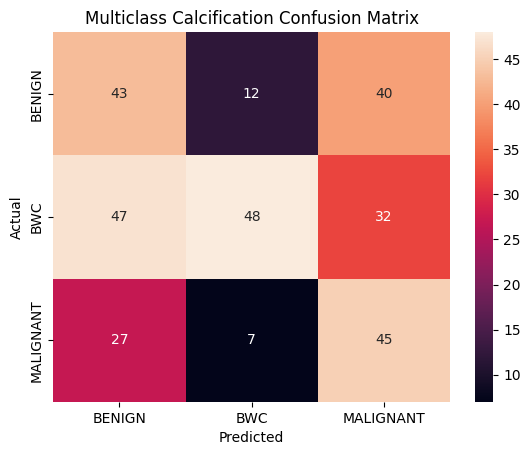

In [ ]:
labels = nb_calc.classes_
labels[1] = "BWC"

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Calcification Confusion Matrix (Naive Bayes)")
plt.show()

In [100]:
print(f"Mass Naive Bayes Model Accuracy: {accuracy_score(y_pred_mass, mass_test_targets)} \n")
print(classification_report(y_pred_mass, mass_test_targets))

Mass Naive Bayes Model Accuracy: 0.3805309734513274 

                         precision    recall  f1-score   support

                 BENIGN       0.23      0.54      0.32        71
BENIGN_WITHOUT_CALLBACK       0.27      0.12      0.17        80
              MALIGNANT       0.59      0.43      0.50       188

               accuracy                           0.38       339
              macro avg       0.36      0.36      0.33       339
           weighted avg       0.44      0.38      0.38       339



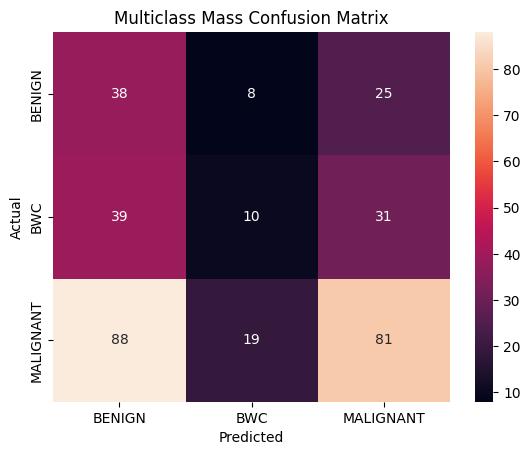

In [ ]:
labels = nb_mass.classes_
labels[1] = "BWC"

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Mass Confusion Matrix (Naive Bayes)")
plt.show()

<b><font size = 5>Binary Naive Bayes (BENIGN, MALIGNANT)</font></b>

In [102]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [103]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test", DIM)

In [104]:
nb_calc = GaussianNB()
nb_calc.fit(calc_train_data, calc_train_targets)

nb_mass = GaussianNB()
nb_mass.fit(mass_train_data, mass_train_targets)

GaussianNB()

In [105]:
y_pred_calc = nb_calc.predict(calc_test_data)
calc_confusion = confusion_matrix(y_pred_calc, calc_test_targets)

y_pred_mass = nb_mass.predict(mass_test_data)
mass_confusion = confusion_matrix(y_pred_mass, mass_test_targets)

<b><font size = 3>Binary Results:</b></font>

In [106]:
print(f"Calcification Naive Bayes Model Accuracy: {accuracy_score(y_pred_calc, calc_test_targets)} \n")
print(classification_report(y_pred_calc, calc_test_targets))

Calcification Naive Bayes Model Accuracy: 0.6275862068965518 

              precision    recall  f1-score   support

      BENIGN       0.68      0.69      0.69       171
   MALIGNANT       0.55      0.54      0.54       119

    accuracy                           0.63       290
   macro avg       0.61      0.61      0.61       290
weighted avg       0.63      0.63      0.63       290



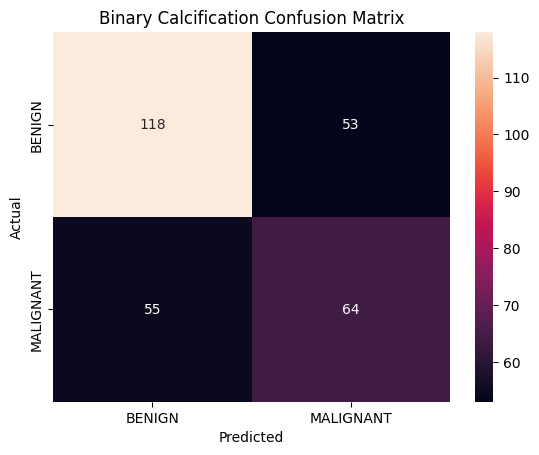

In [ ]:
labels = nb_calc.classes_

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Calcification Confusion Matrix (Naive Bayes)")
plt.show()

In [108]:
print(f"Mass Naive Bayes Model Accuracy: {accuracy_score(y_pred_mass, mass_test_targets)} \n")
print(classification_report(y_pred_mass, mass_test_targets))

Mass Naive Bayes Model Accuracy: 0.5184049079754601 

              precision    recall  f1-score   support

      BENIGN       0.45      0.62      0.52       138
   MALIGNANT       0.61      0.45      0.52       188

    accuracy                           0.52       326
   macro avg       0.53      0.53      0.52       326
weighted avg       0.54      0.52      0.52       326



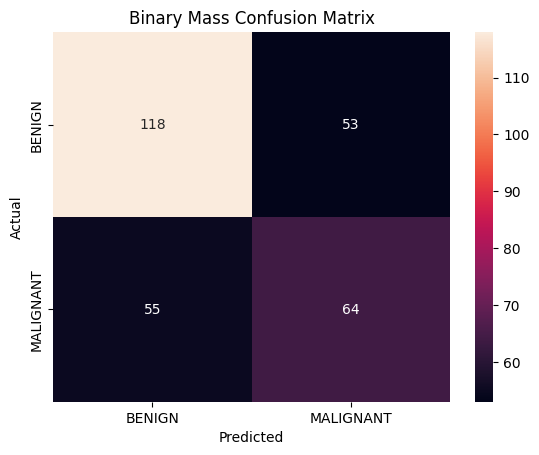

In [ ]:
labels = nb_calc.classes_

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Mass Confusion Matrix (Naive Bayes)")
plt.show()